In [294]:
import pickle
import pandas as pd
import datetime
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('mode.chained_assignment', None)

from sklearn.preprocessing import MinMaxScaler, RobustScaler
import tensorflow as tf

from tensorflow.keras import Model, Sequential

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanAbsoluteError
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers.experimental.preprocessing import Normalization

from tensorflow.keras.preprocessing import timeseries_dataset_from_array

In [295]:
parent_folder = os.path.normpath(os.getcwd()+ os.sep + os.pardir)
root_path = (os.path.join(parent_folder,'raw_data'))

In [385]:
merged_tele = pickle.load(open('merged_telemetry.pkl', 'rb'))

In [386]:
merged_tele

,property_id,occurred,target_temperature_zone1,weather_temperature,weather_humidity,internal_temperature,internal_humidity,value
0,20187,2020-10-28 13:18:00,22.0,9.0,87.0,17.4,59.4,2
1,20187,2020-10-28 13:29:00,22.0,9.0,87.0,18.0,57.7,2
2,20187,2020-10-28 13:39:00,22.0,9.0,87.0,17.7,57.8,4
3,20187,2020-10-28 13:49:00,22.0,9.0,87.0,17.7,58.1,5
4,20187,2020-10-28 13:59:00,25.0,9.0,87.0,17.8,58.5,8
...,...,...,...,...,...,...,...,...
2609342,20255,2022-12-31 23:13:00,5.0,8.9,88.0,14.4,63.5,9856
2609343,20255,2022-12-31 23:23:00,5.0,8.9,88.0,14.4,63.4,9856
2609344,20255,2022-12-31 23:33:00,5.0,8.9,88.0,14.4,63.4,9856
2609345,20255,2022-12-31 23:43:00,5.0,8.9,88.0,14.4,63.5,9856


In [390]:
# Ensure 'hour' is in datetime format
merged_tele['hour'] = merged_tele['occurred'].dt.hour

merged_tele['energy'] = merged_tele['value'].diff()

In [392]:
merged_tele['energy'].value_counts()

energy
 0.0        1962554
 1.0         360276
 2.0         249293
 3.0          28436
 4.0           6013
             ...   
 37.0             1
 3104.0           1
-26709.0          1
 718.0            1
 318.0            1
Name: count, Length: 163, dtype: int64

In [383]:
merged_tele

,property_id,occurred,target_temperature_zone1,weather_temperature,weather_humidity,internal_temperature,internal_humidity,value,hour
0,20187,2020-10-28 13:18:00,22.0,9.0,87.0,17.4,59.4,2,1970-01-01 00:00:00.000000013
1,20187,2020-10-28 13:29:00,22.0,9.0,87.0,18.0,57.7,2,1970-01-01 00:00:00.000000013
2,20187,2020-10-28 13:39:00,22.0,9.0,87.0,17.7,57.8,4,1970-01-01 00:00:00.000000013
3,20187,2020-10-28 13:49:00,22.0,9.0,87.0,17.7,58.1,5,1970-01-01 00:00:00.000000013
4,20187,2020-10-28 13:59:00,25.0,9.0,87.0,17.8,58.5,8,1970-01-01 00:00:00.000000013
...,...,...,...,...,...,...,...,...,...
2609342,20255,2022-12-31 23:13:00,5.0,8.9,88.0,14.4,63.5,9856,1970-01-01 00:00:00.000000023
2609343,20255,2022-12-31 23:23:00,5.0,8.9,88.0,14.4,63.4,9856,1970-01-01 00:00:00.000000023
2609344,20255,2022-12-31 23:33:00,5.0,8.9,88.0,14.4,63.4,9856,1970-01-01 00:00:00.000000023
2609345,20255,2022-12-31 23:43:00,5.0,8.9,88.0,14.4,63.5,9856,1970-01-01 00:00:00.000000023


In [296]:
os.chdir(root_path)

dict_week = pickle.load(open('dict_week.pkl','rb'))

week_35 = dict_week[35].copy()
week_17 = dict_week[17].copy()

del dict_week[35]
del dict_week[17]

dict_32 = {}
for key, value in dict_week.items():
    if key >= 36:
        new_key = key - 35
    else:
        new_key = key + 16
    dict_32[new_key] = value

dict_verification = dict(list(dict_32.items())[-2:])
dict_for_x =  dict(list(dict_32.items())[:-2])


for k,v in dict_for_x.items():
    df = dict_for_x[k].copy()
    df = df.reset_index(drop=True)
    dict_for_x[k]= df

concatenate_df = pd.concat(dict_for_x.values())
concatenate_df = concatenate_df.reset_index(drop = True)

concatenate_df.at[18393,'energy'] =6

concatenate_df['energy_diff'] = concatenate_df['energy'].diff()
concatenate_df= concatenate_df[1:]

# scaler = RobustScaler()
# concatenate_df = scaler.fit_transform(concatenate_df)

# n = len(concatenate_df)
# # split 70:20:10 (train: validation: test)
# train_df = concatenate_df[0:int(n*0.7)]
# val_df = concatenate_df[int(n*0.7): int(n*0.9)]
# test_df = concatenate_df[int(n*0.9):]
#%%

# # initialize
# scaler = RobustScaler()

# # scale our training
# scaler.fit(train_df)

# # transform all validation and test
# train_df.loc[:,train_df.columns] = scaler.transform(train_df[train_df.columns])
# val_df.loc[:,val_df.columns] = scaler.transform(val_df[val_df.columns])
# test_df.loc[:,test_df.columns] = scaler.transform(test_df[test_df.columns])


In [297]:
# Let's define the global variables of our dataset
TARGET = 'energy'
N_TARGETS = 1 ## previously 11
N_FEATURES = 11

In [298]:
concatenate_df

,target_temperature_zone1,weather_temperature,weather_humidity,internal_temperature,internal_humidity,energy,day_sin,day_cos,week_sin,week_cos,energy_diff
1,21.0,17.8,78.0000,22.9,59.0,0.0,-0.177944,0.984041,-0.410719,-0.911762,0.0
2,21.0,17.8,78.0000,22.9,58.9,0.0,-0.134851,0.990866,-0.416394,-0.909184,0.0
3,21.0,17.8,78.0000,22.8,59.0,0.0,-0.091502,0.995805,-0.422053,-0.906571,0.0
4,21.0,15.6,85.0000,22.8,59.0,0.0,-0.047978,0.998848,-0.427696,-0.903923,0.0
5,21.0,15.6,85.0000,22.8,59.1,0.0,-0.004363,0.999990,-0.433322,-0.901239,0.0
...,...,...,...,...,...,...,...,...,...,...,...
30235,20.0,7.2,60.9734,19.8,34.1,0.0,-0.430511,0.902585,-0.375762,-0.926716,0.0
30236,20.0,7.2,60.9734,19.7,34.3,0.0,-0.390731,0.920505,-0.381531,-0.924356,0.0
30237,20.0,7.2,60.9734,19.7,34.4,0.0,-0.346117,0.938191,-0.387860,-0.921718,0.0
30238,20.0,7.2,60.9734,19.7,34.5,0.0,-0.304864,0.952396,-0.393598,-0.919283,0.0


In [365]:
hourly_df = concatenate_df.groupby(concatenate_df.index//6).mean()
hourly_df['energy'].value_counts()

energy
0.000000    3448
0.166667     279
0.500000     139
0.666667     127
1.333333     125
1.666667     124
1.000000     124
1.166667     124
0.833333     122
1.500000     119
0.333333     104
1.833333      96
2.000000      71
2.166667      25
2.333333       9
0.416667       1
3.000000       1
2.500000       1
2.833333       1
Name: count, dtype: int64

In [299]:
concatenate_df['energy'].value_counts()

energy
0.0     25330
2.0      2438
1.0      1613
3.0       666
4.0       129
5.0        36
6.0        18
7.0         5
1.5         1
12.0        1
8.0         1
9.0         1
Name: count, dtype: int64

<Axes: >

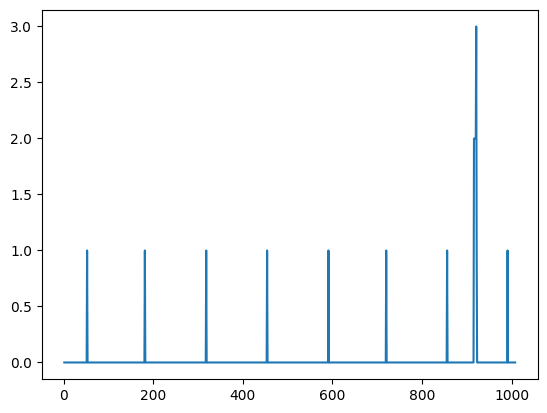

In [300]:
concatenate_df.loc[:1008,'energy'].plot()

In [302]:
# --------------------------------------------------- #
# Let's consider FOLDS with a length of 3 years       #
# (2 years will be used for train, 1 for test!)       #
# --------------------------------------------------- #

FOLD_LENGTH = 144*7*11 # every 3 hrs x 8 = 24h
                        # three years

# --------------------------------------------------- #
# Let's consider FOLDS starting every trimester       #
# --------------------------------------------------- #

FOLD_STRIDE = 144*2*7 # every 3 hrs x 8 = 24h
                   # 1 quarter = 91 days

# --------------------------------------------------- #
# Let's consider a train-test-split ratio of 2/3      #
# --------------------------------------------------- #

TRAIN_TEST_RATIO = 0.5

In [303]:
def get_folds(
    df: pd.DataFrame,
    fold_length: int,
    fold_stride: int) -> list[pd.DataFrame]:
    """
    This function slides through the Time Series dataframe of shape (n_timesteps, n_features) to create folds
    - of equal `fold_length`
    - using `fold_stride` between each fold

    Args:
        df (pd.DataFrame): Overall dataframe
        fold_length (int): How long each fold should be in rows
        fold_stride (int): How many timesteps to move forward between taking each fold

    Returns:
        List[pd.DataFrame]: A list where each fold is a dataframe within
    """
    # $CHALLENGIFY_BEGIN

    folds = []
    for idx in range(0, len(df), fold_stride):
        # Exits the loop as soon as the last fold index would exceed the last index
        if (idx + fold_length) > len(df):
            break
        fold = df.iloc[idx:idx + fold_length, :]
        folds.append(fold)
    return folds

In [304]:
folds = get_folds(concatenate_df, FOLD_LENGTH, FOLD_STRIDE)

print(f'The function generated {len(folds)} folds.')
print(f'Each fold has a shape equal to {folds[0].shape}.')

The function generated 10 folds.
Each fold has a shape equal to (11088, 11).


In [305]:
fold = folds[0]
print(fold.shape)
fold

(11088, 11)


,target_temperature_zone1,weather_temperature,weather_humidity,internal_temperature,internal_humidity,energy,day_sin,day_cos,week_sin,week_cos,energy_diff
1,21.0,17.8,78.0,22.9,59.0,0.0,-0.177944,0.984041,-0.410719,-0.911762,0.0
2,21.0,17.8,78.0,22.9,58.9,0.0,-0.134851,0.990866,-0.416394,-0.909184,0.0
3,21.0,17.8,78.0,22.8,59.0,0.0,-0.091502,0.995805,-0.422053,-0.906571,0.0
4,21.0,15.6,85.0,22.8,59.0,0.0,-0.047978,0.998848,-0.427696,-0.903923,0.0
5,21.0,15.6,85.0,22.8,59.1,0.0,-0.004363,0.999990,-0.433322,-0.901239,0.0
...,...,...,...,...,...,...,...,...,...,...,...
11084,20.0,3.3,88.0,19.9,36.2,0.0,-0.134851,0.990866,-0.416394,-0.909184,0.0
11085,20.0,3.3,88.0,19.7,36.4,0.0,-0.091502,0.995805,-0.422053,-0.906571,0.0
11086,20.0,3.3,88.0,19.6,36.7,0.0,-0.047978,0.998848,-0.427696,-0.903923,0.0
11087,20.0,3.3,88.0,19.6,36.9,0.0,-0.004363,0.999990,-0.433322,-0.901239,0.0


In [306]:
INPUT_LENGTH = 1 # records every 3 hours x 8 = 24 hours
                      # two weeks
                      # 1 day for us
                      
                      # changed input length to 1 from 144

In [307]:
def train_test_split(fold:pd.DataFrame,
                     train_test_ratio: float,
                     input_length: int) -> tuple[pd.DataFrame]:
    """From a fold dataframe, take a train dataframe and test dataframe based on
    the split ratio.
    - df_train should contain all the timesteps until round(train_test_ratio * len(fold))
    - df_test should contain all the timesteps needed to create all (X_test, y_test) tuples

    Args:
        fold (pd.DataFrame): A fold of timesteps
        train_test_ratio (float): The ratio between train and test 0-1
        input_length (int): How long each X_i will be

    Returns:
        Tuple[pd.DataFrame]: A tuple of two dataframes (fold_train, fold_test)
    """
    # $CHALLENGIFY_BEGIN

    # TRAIN SET
    # ======================
    last_train_idx = round(train_test_ratio * len(fold))
    fold_train = fold.iloc[0:last_train_idx, :]

    # TEST SET
    # ======================
    first_test_idx = last_train_idx - input_length
    fold_test = fold.iloc[first_test_idx:, :]

    return (fold_train, fold_test)

    # $CHALLENGIFY_END

In [308]:
(fold_train, fold_test) = train_test_split(fold, TRAIN_TEST_RATIO, INPUT_LENGTH)


In [309]:
fold_train.shape, fold_test.shape

((5544, 11), (5545, 11))

In [310]:
print(f'N_FEATURES = {N_FEATURES}')
print(f'INPUT_LENGTH = {INPUT_LENGTH} timesteps = {int(INPUT_LENGTH/144)} days = {int(INPUT_LENGTH/144/7)} weeks')

N_FEATURES = 11
INPUT_LENGTH = 1 timesteps = 0 days = 0 weeks


In [311]:
# TARGET Y
print(f'N_TARGETS = {N_TARGETS}')

# Let's only predict 1 value ahead of us
OUTPUT_LENGTH = 1
print(f'OUTPUT_LENGTH = {OUTPUT_LENGTH}')

N_TARGETS = 1
OUTPUT_LENGTH = 1


In [312]:
SEQUENCE_STRIDE = 1

In [333]:
def get_X_y_strides(fold: pd.DataFrame, input_length: int, output_length: int,
    sequence_stride: int) -> tuple[np.array]:
    """slides through a `fold` Time Series (2D array) to create sequences of equal
        * `input_length` for X,
        * `output_length` for y,
    using a temporal gap `sequence_stride` between each sequence

    Args:
        fold (pd.DataFrame): One single fold dataframe
        input_length (int): Length of each X_i
        output_length (int): Length of each y_i
        sequence_stride (int): How many timesteps to take before taking the next X_i

    Returns:
        Tuple[np.array]: A tuple of numpy arrays (X, y)
    """
    X, y = [], []

    for i in range(0, len(fold), sequence_stride):
        # Exits the loop as soon as the last fold index would exceed the last index
        if (i + input_length + output_length) >= len(fold):
            break
        X_i = fold.iloc[i:i + input_length, :]
        y_i = fold.iloc[i + input_length:i + input_length + output_length, :][[TARGET]] ## consider!
        X.append(X_i)
        y.append(y_i)

    return (np.array(X), np.array(y))

In [334]:
print("FOLD_LENGTH")
print(f"= {FOLD_LENGTH} timesteps")
print(f"= {int(FOLD_LENGTH/144)} days") # 
print(f"= {int(FOLD_LENGTH/144/7)} weeks")

FOLD_LENGTH
= 11088 timesteps
= 77 days
= 11 weeks


In [335]:
fold_train

,target_temperature_zone1,weather_temperature,weather_humidity,internal_temperature,internal_humidity,energy,day_sin,day_cos,week_sin,week_cos,energy_diff
1,21.0,17.8,78.0,22.9,59.0,0.0,-0.177944,0.984041,-0.410719,-0.911762,0.0
2,21.0,17.8,78.0,22.9,58.9,0.0,-0.134851,0.990866,-0.416394,-0.909184,0.0
3,21.0,17.8,78.0,22.8,59.0,0.0,-0.091502,0.995805,-0.422053,-0.906571,0.0
4,21.0,15.6,85.0,22.8,59.0,0.0,-0.047978,0.998848,-0.427696,-0.903923,0.0
5,21.0,15.6,85.0,22.8,59.1,0.0,-0.004363,0.999990,-0.433322,-0.901239,0.0
...,...,...,...,...,...,...,...,...,...,...,...
5540,19.0,13.3,90.0,18.9,62.4,0.0,0.418660,-0.908143,0.377494,0.926012,0.0
5541,19.0,13.3,90.0,18.9,62.4,0.0,0.378649,-0.925541,0.383259,0.923641,0.0
5542,19.0,13.3,90.0,18.9,62.4,0.0,0.337917,-0.941176,0.389009,0.921234,0.0
5543,19.0,15.0,79.0,18.9,62.3,0.0,0.296542,-0.955020,0.394744,0.918791,0.0


In [336]:
X_train, y_train = get_X_y_strides(fold_train, INPUT_LENGTH, OUTPUT_LENGTH, SEQUENCE_STRIDE)
X_test, y_test = get_X_y_strides(fold_test, INPUT_LENGTH, OUTPUT_LENGTH, SEQUENCE_STRIDE)

print(X_train.shape)
print(y_train.shape)

(5542, 1, 11)
(5542, 1, 1)


In [337]:
y_train.shape[1]

1

In [338]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.regularizers import L1L2
from tensorflow.keras.layers.experimental.preprocessing import Normalization

 
def init_model(X_train, y_train):

    # $CHALLENGIFY_BEGIN

    # 0 - Normalization
    # ======================
    normalizer = Normalization()
    normalizer.adapt(X_train)

    # 1 - RNN architecture
    # ======================
    model = models.Sequential()
    ## 1.0 - All the rows will be standardized through the already adapted normalization layer
    model.add(normalizer)
    ## 1.1 - Recurrent Layer
    model.add(layers.LSTM(64,
                          activation='tanh',
                          return_sequences = True,
                          kernel_regularizer=L1L2(l1=0.05, l2=0.05),
                          ))
    ## 1.2 - Predictive Dense Layers
    output_length = y_train.shape[1]
    model.add(layers.Dense(output_length, activation='linear'))

    # 2 - Compiler
    # ======================
    adam = optimizers.Adam(learning_rate=0.02)
    model.compile(loss='mse', optimizer=adam, metrics=["mae"])

    return model

In [339]:
model = init_model(X_train, y_train)
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_16 (Normaliz  (None, None, 11)          23        
 ation)                                                          
                                                                 
 lstm_16 (LSTM)              (None, None, 64)          19456     
                                                                 
 dense_16 (Dense)            (None, None, 1)           65        
                                                                 
Total params: 19544 (76.35 KB)
Trainable params: 19521 (76.25 KB)
Non-trainable params: 23 (96.00 Byte)
_________________________________________________________________


In [340]:
def plot_history(history):

    fig, ax = plt.subplots(1,2, figsize=(20,7))
    # --- LOSS: MSE ---
    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])
    ax[0].set_title('MSE')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')
    ax[0].legend(['Train', 'Validation'], loc='best')
    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- METRICS:MAE ---

    ax[1].plot(history.history['mae'])
    ax[1].plot(history.history['val_mae'])
    ax[1].set_title('MAE')
    ax[1].set_ylabel('MAE')
    ax[1].set_xlabel('Epoch')
    ax[1].legend(['Train', 'Validation'], loc='best')
    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    return ax

In [354]:
from tensorflow import keras
from keras.callbacks import EarlyStopping

def fit_model(model: tf.keras.Model, verbose=1) -> tuple[tf.keras.Model, dict]:

    # $CHALLENGIFY_BEGIN
    es = EarlyStopping(monitor = "val_loss",
                      patience = 13,
                      mode = "min",
                      restore_best_weights = True)


    history = model.fit(X_train, y_train,
                        validation_split = 0.3,
                        shuffle = False,
                        batch_size = 32,
                        epochs = 50,
                        callbacks = [es],
                        verbose = verbose)

    return model, history

In [355]:
# 1 - Initialising the RNN model
# ====================================

model = init_model(X_train, y_train)
model.summary()

# 2 - Training
# ====================================
model, history = fit_model(model)

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_18 (Normaliz  (None, None, 11)          23        
 ation)                                                          
                                                                 
 lstm_18 (LSTM)              (None, None, 64)          19456     
                                                                 
 dense_18 (Dense)            (None, None, 1)           65        
                                                                 
Total params: 19544 (76.35 KB)
Trainable params: 19521 (76.25 KB)
Non-trainable params: 23 (96.00 Byte)
_________________________________________________________________
Epoch 1/50
122/122 [==============================] - 3s 9ms/step - loss: 1.0124 - mae: 0.0984 - val_loss: 0.6009 - val_mae: 0.1081
Epoch 2/50
122/122 [==============================] - 1s 5ms/step - loss: 0.5099 

array([<Axes: title={'center': 'MSE'}, xlabel='Epoch', ylabel='Loss'>,
       <Axes: title={'center': 'MAE'}, xlabel='Epoch', ylabel='MAE'>],
      dtype=object)

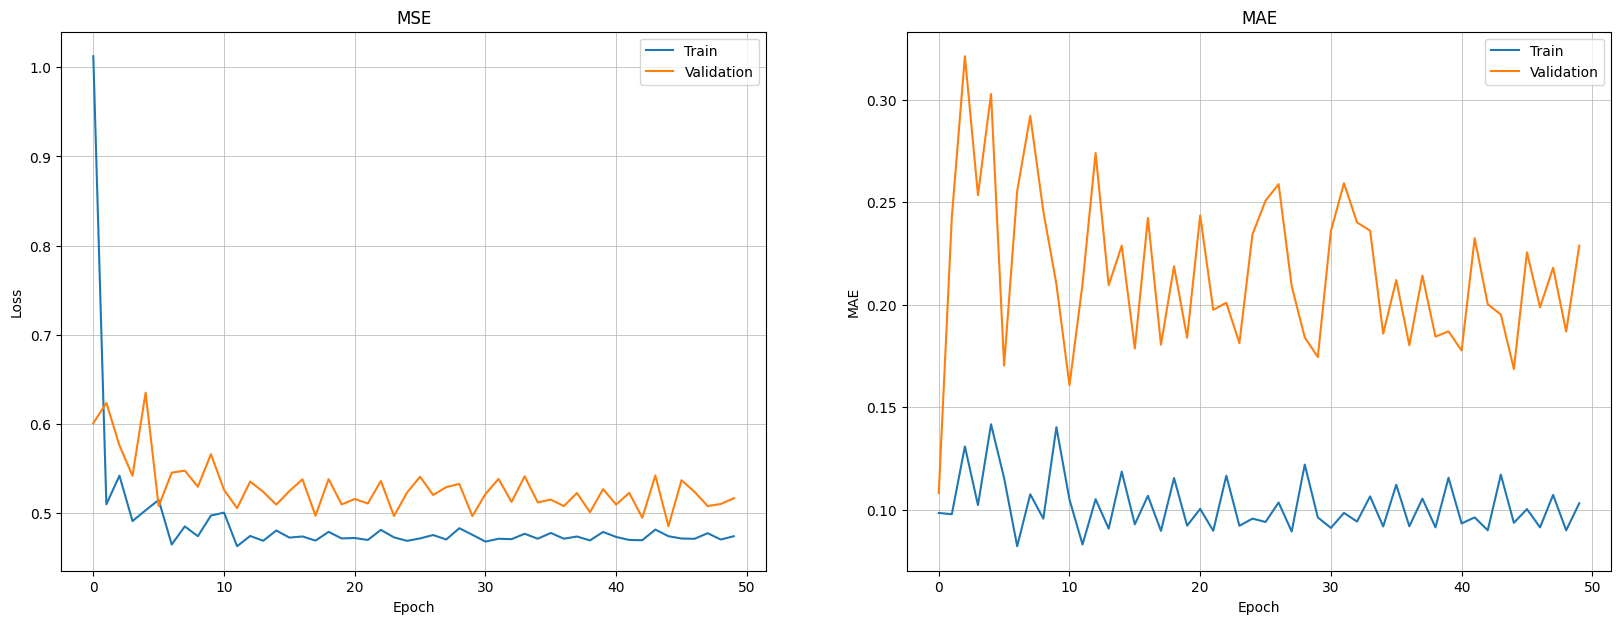

In [356]:
plot_history(model.history)

In [344]:
y_test.shape

(5543, 1, 1)

In [345]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

# make predictions
test_predict = model.predict(X_test)
# invert predictions
# Perform inverse transformation on predictions
mean = model.layers[0].mean.numpy()
variance = model.layers[0].variance.numpy()
# Perform inverse transformation manually
test_predict = test_predict * np.sqrt(variance) + mean

174/174 [==============================] - 0s 748us/step


In [346]:
test_predict.shape

(5543, 1, 11)

In [347]:
test_predict_reshaped = test_predict.reshape(test_predict.shape[0], -1)
df = pd.DataFrame(test_predict_reshaped)

<Axes: xlabel='energy', ylabel='Count'>

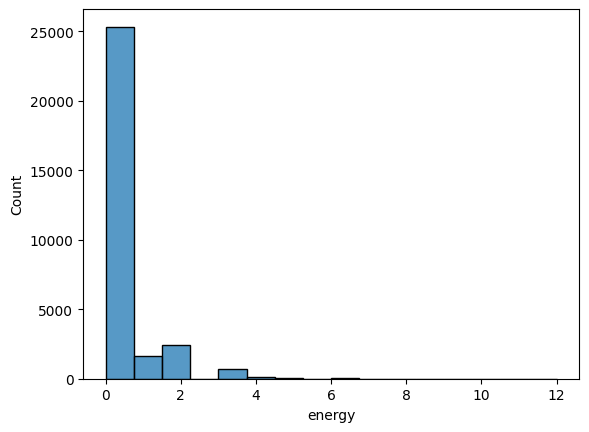

In [348]:
concatenate_df['energy'].value_counts()
sns.histplot(concatenate_df['energy'])

<Axes: xlabel='5', ylabel='Count'>

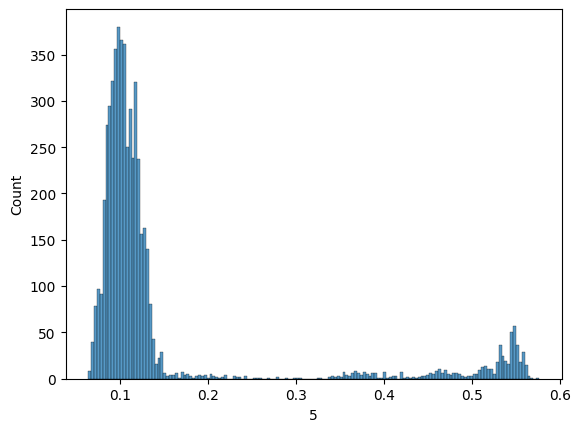

In [349]:
sns.histplot(df.iloc[:,5])

In [350]:
max(df.iloc[:,5])

0.5758470892906189

<Axes: >

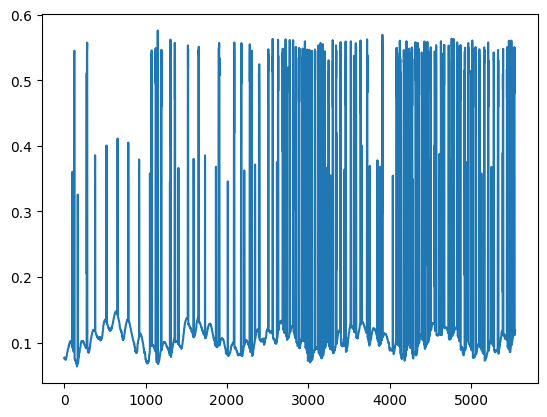

In [351]:
df.iloc[:,5].plot()

<Axes: >

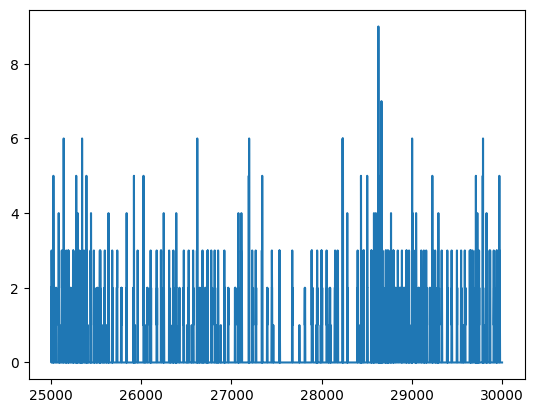

In [352]:
concatenate_df.iloc[25000:30000,5].plot()